In [214]:
import pandas as pd
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
movies = pd.read_csv('movies.csv')
credits = pd.read_csv('credits.csv') 

In [216]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [217]:
movies.shape

(4803, 20)

In [218]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [219]:
movies = movies.merge(credits,on='title')

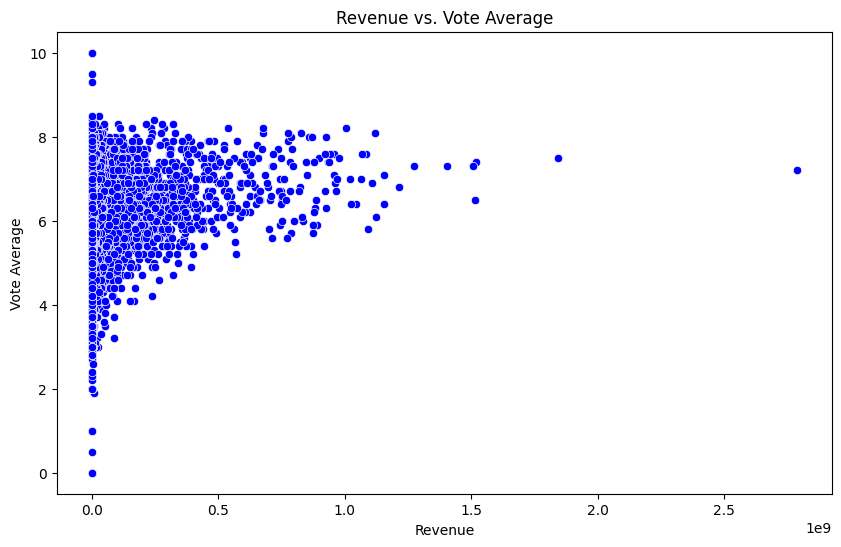

In [220]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=movies['revenue'], y=movies['vote_average'], color='blue')
plt.title('Revenue vs. Vote Average')
plt.xlabel('Revenue')
plt.ylabel('Vote Average')
plt.show()

In [221]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew','vote_average']] # eliminating a few unnecessary features

In [222]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9


In [223]:
def extract(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L 

In [224]:
movies.dropna(inplace=True)

In [225]:
movies['genres'] = movies['genres'].apply(extract)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9


In [226]:
movies['keywords'] = movies['keywords'].apply(extract)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9


In [227]:
movies['cast'] = movies['cast'].apply(extract)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9


In [228]:
def top_cast(cast_list):
    return cast_list[0:3] 

movies['cast'] = movies['cast'].apply(top_cast)

movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9


In [229]:
def director(text):
    directors = []
    people = ast.literal_eval(text)
    for person in people:
        job = person.get('job')
        if job and job == 'Director':
            director_name = person.get('name')
            if director_name:
                directors.append(director_name)
    return directors

In [230]:
movies['crew'] = movies['crew'].apply(director)

In [231]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],6.9


In [232]:
def tokenise(L):
    tokenised_list = []
    for item in L: 
        modified_item = item.replace(" ", "")
        tokenised_list.append(modified_item)
    return tokenised_list

In [233]:
movies['cast'] = movies['cast'].apply(tokenise)
movies['crew'] = movies['crew'].apply(tokenise)
movies['genres'] = movies['genres'].apply(tokenise)
movies['keywords'] = movies['keywords'].apply(tokenise)

In [234]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew,vote_average
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],7.2
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],6.9


In [235]:
def split_overview(text):
    return text.split()

In [236]:
movies['overview'] = movies['overview'].apply(split_overview)

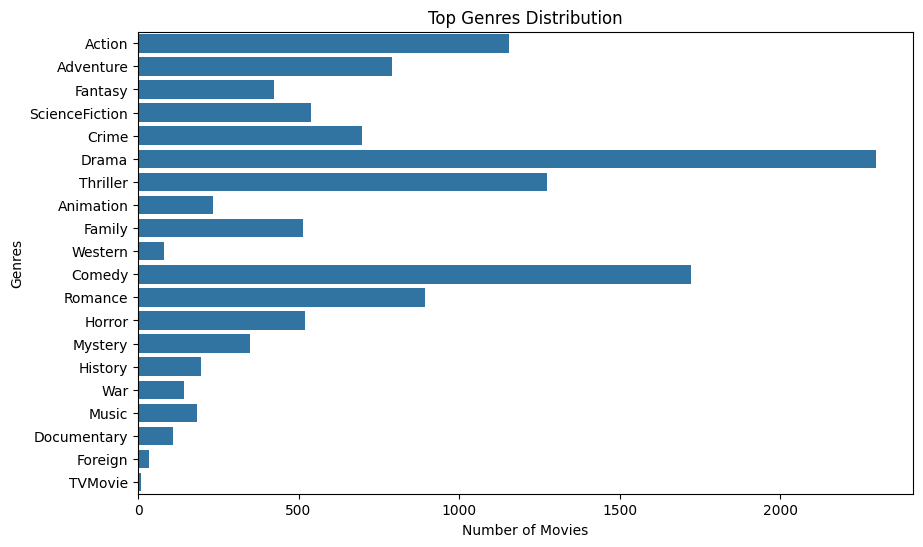

In [237]:

all_genres = [genre for sublist in movies['genres'] for genre in sublist]

plt.figure(figsize=(10,6))
sns.countplot(y=all_genres)
plt.title('Top Genres Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

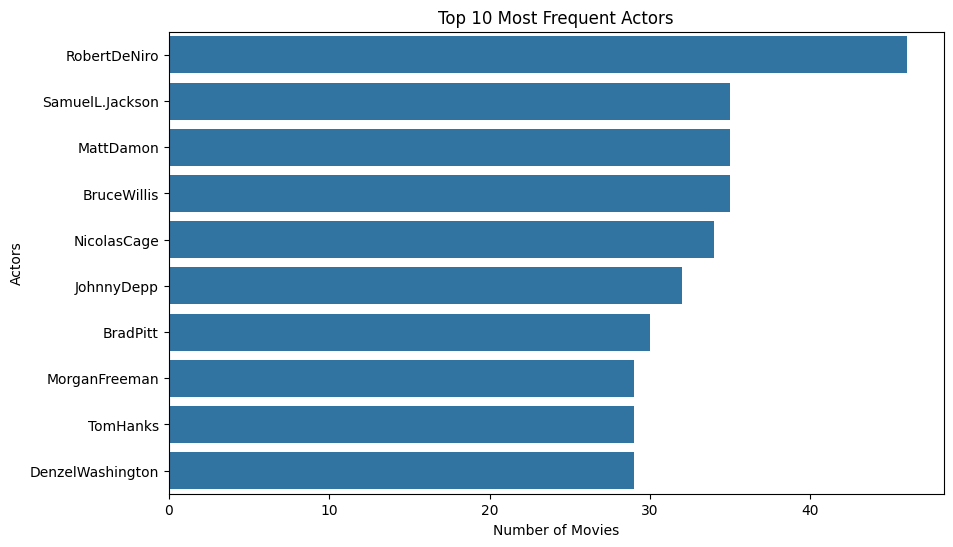

In [238]:
all_cast = [actor for sublist in movies['cast'] for actor in sublist]

plt.figure(figsize=(10,6))
sns.countplot(y=all_cast, order=pd.Series(all_cast).value_counts().index[:10])  # Top 10 actors
plt.title('Top 10 Most Frequent Actors')
plt.xlabel('Number of Movies')
plt.ylabel('Actors')
plt.show()

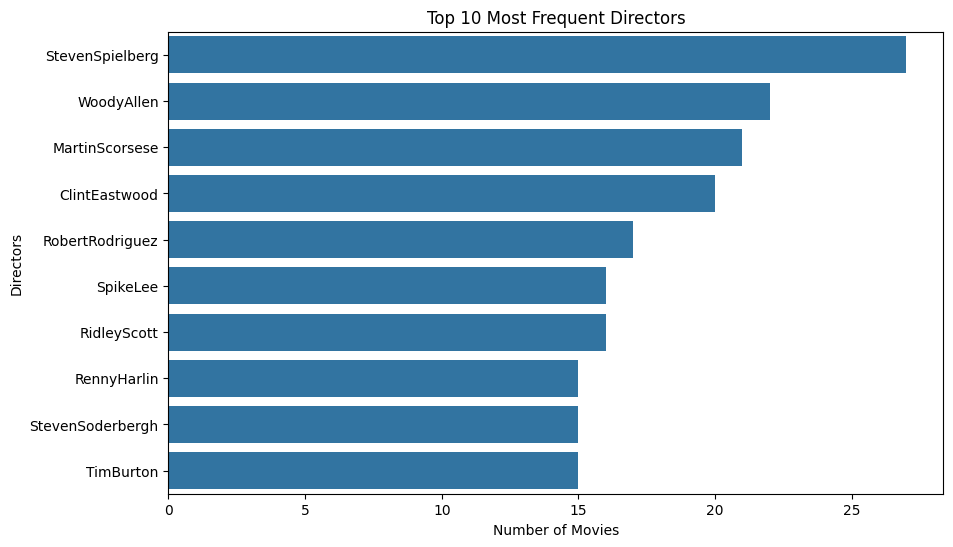

In [239]:
all_crew = [director for sublist in movies['crew'] for director in sublist]

plt.figure(figsize=(10,6))
sns.countplot(y=all_crew, order=pd.Series(all_crew).value_counts().index[:10])  # Top 10 actors
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Movies')
plt.ylabel('Directors')
plt.show()

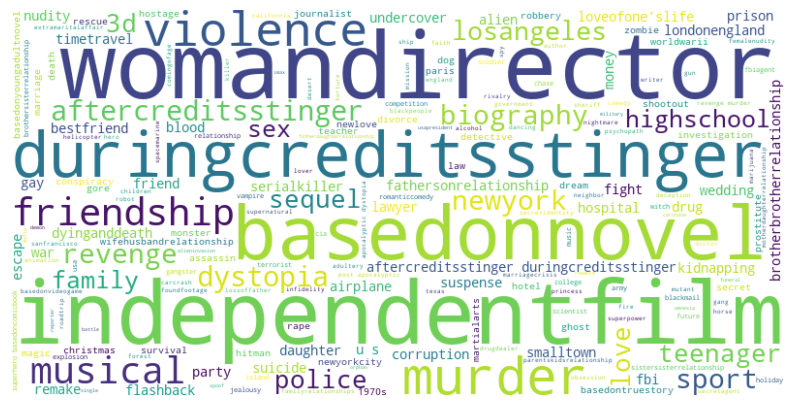

In [240]:
from wordcloud import WordCloud

all_keywords = " ".join([" ".join(keywords) for keywords in movies['keywords']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


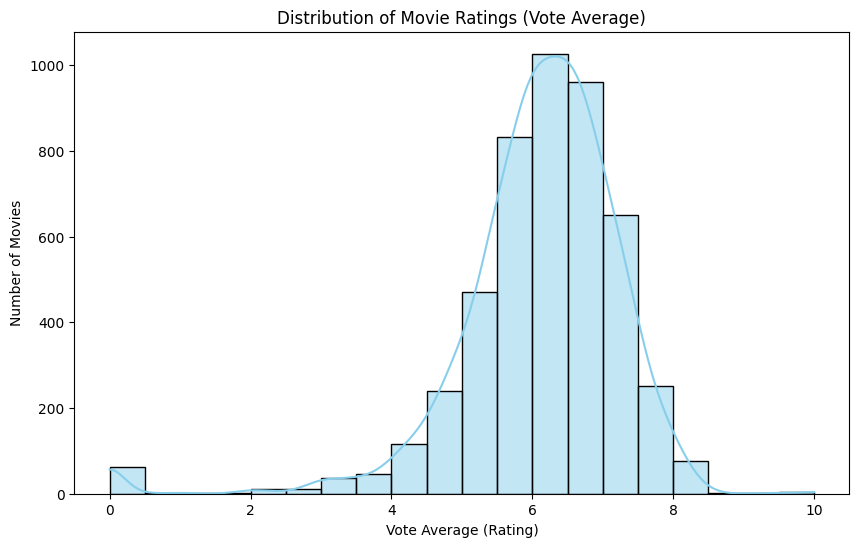

In [241]:
plt.figure(figsize=(10,6))
sns.histplot(movies['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings (Vote Average)')
plt.xlabel('Vote Average (Rating)')
plt.ylabel('Number of Movies')
plt.show()

Similarity weights

In [242]:
def join_items(text):
    return ' '.join(text)

In [243]:
# Converting list columns (genres, cast, crew, keywords) back to a single string for vectorization
movies['genres'] = movies['genres'].apply(join_items)
movies['overview'] = movies['overview'].apply(join_items)
movies['cast'] = movies['cast'].apply(join_items)
movies['crew'] = movies['crew'].apply(join_items)
movies['keywords'] = movies['keywords'].apply(join_items)

In [244]:
# making separate feature vectors for each column
tfidf_genres = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_overview = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_cast = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_crew = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_keywords = TfidfVectorizer(max_features=5000, stop_words='english')

genres_vector = tfidf_genres.fit_transform(movies['genres']).toarray()
overview_vector = tfidf_overview.fit_transform(movies['overview']).toarray()
cast_vector = tfidf_cast.fit_transform(movies['cast']).toarray()
crew_vector = tfidf_crew.fit_transform(movies['crew']).toarray()
keywords_vector = tfidf_keywords.fit_transform(movies['keywords']).toarray()


In [245]:
global weight_genres, weight_cast, weight_overview, weight_crew, weight_keywords
# Calculating Cosine similarity for each feature
similarity_genres = cosine_similarity(genres_vector)
similarity_overview = cosine_similarity(overview_vector)
similarity_cast = cosine_similarity(cast_vector)
similarity_crew = cosine_similarity(crew_vector)
similarity_keywords = cosine_similarity(keywords_vector)

# Assigning weights to the features
weight_genres = 0.3
weight_overview = 0.1
weight_cast = 0.2
weight_crew = 0.2
weight_keywords = 0.2


# Calculating the final similarity matrix using weighted sum
similarity = (
    (weight_genres * similarity_genres) +
    (weight_overview * similarity_overview) +
    (weight_cast * similarity_cast) +
    (weight_crew * similarity_crew) +
    (weight_keywords * similarity_keywords)
)

In [246]:
similarity

array([[1.        , 0.25359984, 0.1461099 , ..., 0.        , 0.        ,
        0.        ],
       [0.25359984, 1.        , 0.17284305, ..., 0.00302991, 0.        ,
        0.        ],
       [0.1461099 , 0.17284305, 1.        , ..., 0.0020884 , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00302991, 0.0020884 , ..., 1.        , 0.00232147,
        0.00100189],
       [0.        , 0.        , 0.        , ..., 0.00232147, 0.5       ,
        0.00170768],
       [0.        , 0.        , 0.        , ..., 0.00100189, 0.00170768,
        1.        ]])

In [247]:
def get_similarity(item):
    return item[1]

Similarity Metric on Content Based Filtering

In [248]:
def calculate_overlap(movie1, movie2):
    # Calculate feature overlaps
    genre_overlap = len(set(movie1['genres']).intersection(set(movie2['genres'])))
    keyword_overlap = len(set(movie1['keywords']).intersection(set(movie2['keywords'])))
    cast_overlap = len(set(movie1['cast']).intersection(set(movie2['cast'])))
    
    # Normalize the scores
    total_features = len(movie1['genres']) + len(movie1['keywords']) + len(movie1['cast'])
    overlap_score = (genre_overlap + keyword_overlap + cast_overlap) / total_features
    return round(overlap_score * 100, 2)  # Percentage

Content Based Movie Recommendation Function

In [249]:
final_list=[]

def movie_recommendation(movie):
    try:
        index = movies[movies['title'] == movie].index[0]
        
        distances = list(enumerate(similarity[index]))
        
        distances = sorted(distances, reverse=True, key=get_similarity)
        
        # Retrieve input movie features for comparison
        input_movie_features = movies.iloc[index]
        
        print(f"Recommendations for {movie}:\n")
        for i in distances[1:18]:
            movie_title = movies.iloc[i[0]].title
            
            recommended_movie = movies.iloc[i[0]]
            similarity_score = i[1] * 100  # Convert similarity to a percentage
            if(similarity_score>100):
                similarity_score=99.56
            
            # Calculate feature overlap
            genre_overlap = len(set(input_movie_features['genres'].split()).intersection(set(recommended_movie['genres'].split())))
            keyword_overlap = len(set(input_movie_features['keywords'].split()).intersection(set(recommended_movie['keywords'].split())))
            cast_overlap = len(set(input_movie_features['cast'].split()).intersection(set(recommended_movie['cast'].split())))
            
            # Display recommendation with similarity score and explanation
            print(f"Title: {recommended_movie['title']}")
            print(f"Rating: {recommended_movie['vote_average']}")
            print(f"Similarity Score: {similarity_score:.2f}%")
            print(f"Matching Features: {genre_overlap} genres, {keyword_overlap} keywords, {cast_overlap} cast members\n")
            
            final_list.append({"name": f"{movie_title}", "similarity": f"{similarity_score}"})
    
    except IndexError:
        print(f"'{movie}' not found in the dataset.")
    

Filter Recommendation

In [250]:
print("Choose an option")
print("1. Prefer similar movie genre")
print("2. Prefer similar Overview")
print("3. Prefer similar Cast")
print("4. Prefer simiar Crew")
print("5. Prefer Keywords")
print("6: Exit")

Choose an option
1. Prefer similar movie genre
2. Prefer similar Overview
3. Prefer similar Cast
4. Prefer simiar Crew
5. Prefer Keywords
6: Exit


In [251]:
print("Movie Recommendation System")

movie='The Avengers'

choices=[]

while(True):
    a=int(input("Enter your choice: "))
    if(a!=6):
        choices.append(a)
    else:
        break

Movie Recommendation System


Content Based Movie Recommendation

In [252]:
choices_len=len(choices)

weight_genres = 0.3
weight_overview = 0.1
weight_cast = 0.2
weight_crew = 0.2
weight_keywords = 0.2

print("\t\t\t\t\t\t Based on CONTENT BASED FILTERING\n")

if(choices_len==0):
    movie_recommendation(movie)
else:
    weight=(1 - (5-choices_len)*0.1)/choices_len
    weight_genres=0.1
    weight_overview=0.1
    weight_cast=0.1
    weight_crew=0.1
    weight_keywords=0.1
    for i in range(choices_len):
        if choices[i]==1:
            weight_genres=weight
            
        elif choices[i]==2:
            weight_overview=weight
        elif choices[i]==3:
            weight_cast=weight
        elif choices[i]==4:
            weight_crew=weight
        else:
            weight_keywords=weight
          
    
    similarity = (
        (weight_genres * similarity_genres) +
        (weight_overview * similarity_overview) +
        (weight_cast * similarity_cast) +
        (weight_crew * similarity_crew) +
        (weight_keywords * similarity_keywords)
    )
    movie_recommendation(movie)
    

						 Based on CONTENT BASED FILTERING

Recommendations for The Avengers:

Title: Avengers: Age of Ultron
Rating: 7.3
Similarity Score: 62.58%
Matching Features: 3 genres, 6 keywords, 2 cast members

Title: Serenity
Rating: 7.4
Similarity Score: 44.03%
Matching Features: 3 genres, 0 keywords, 0 cast members

Title: Captain America: The Winter Soldier
Rating: 7.6
Similarity Score: 22.25%
Matching Features: 3 genres, 7 keywords, 1 cast members

Title: Captain America: Civil War
Rating: 7.1
Similarity Score: 22.17%
Matching Features: 3 genres, 6 keywords, 2 cast members

Title: Captain America: The First Avenger
Rating: 6.6
Similarity Score: 19.66%
Matching Features: 3 genres, 6 keywords, 1 cast members

Title: Iron Man 2
Rating: 6.6
Similarity Score: 18.91%
Matching Features: 3 genres, 5 keywords, 1 cast members

Title: Ant-Man
Rating: 7.0
Similarity Score: 18.56%
Matching Features: 3 genres, 6 keywords, 0 cast members

Title: Iron Man 3
Rating: 6.8
Similarity Score: 17.13%
Matching Fea

Similarity Matrix Visualization

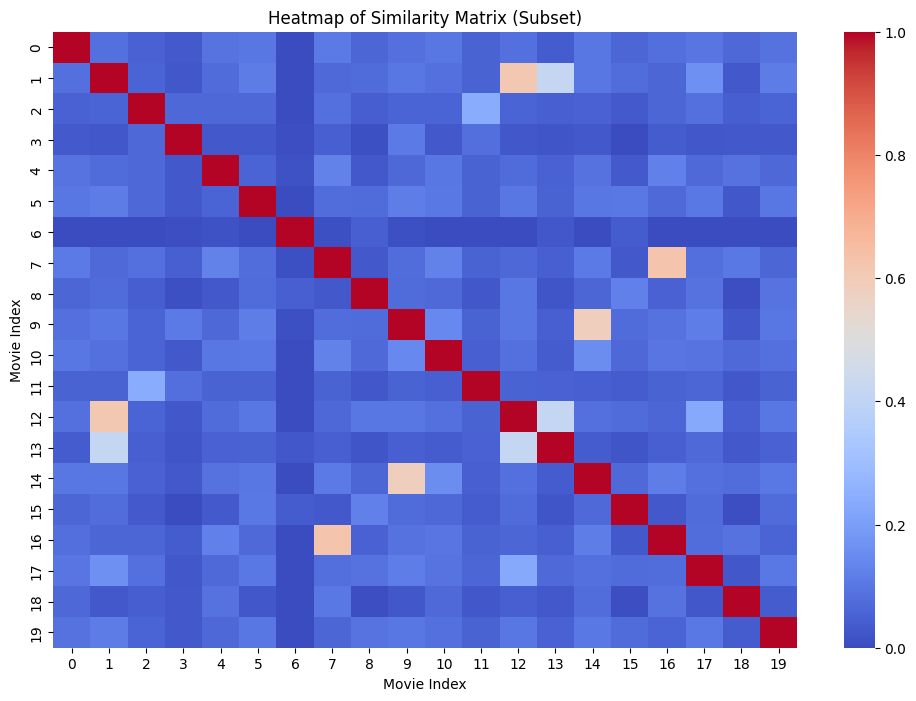

In [253]:
plt.figure(figsize=(12, 8))
sns.heatmap(similarity[:20, :20], cmap='coolwarm', annot=False)  # Display only a subset for clarity
plt.title("Heatmap of Similarity Matrix (Subset)")
plt.xlabel("Movie Index")
plt.ylabel("Movie Index")
plt.show()

Weights Visualization

C:\Users\yashg\AppData\Local\Temp\ipykernel_13320\2575356300.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(weights.keys()), y=list(weights.values()), palette='viridis')


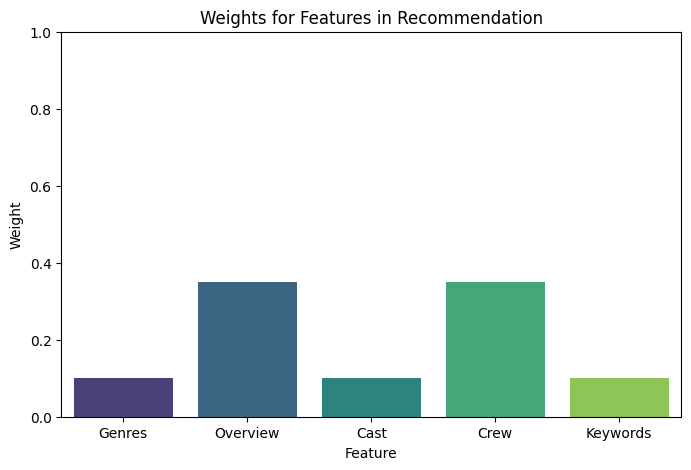

In [254]:
weights = {
    'Genres': weight_genres,
    'Overview': weight_overview,
    'Cast': weight_cast,
    'Crew': weight_crew,
    'Keywords': weight_keywords,
}

plt.figure(figsize=(8, 5))
sns.barplot(x=list(weights.keys()), y=list(weights.values()), palette='viridis')
plt.title('Weights for Features in Recommendation')
plt.xlabel('Feature')
plt.ylabel('Weight')
plt.ylim(0, 1)
plt.show()

Vote Average Visualization

C:\Users\yashg\AppData\Local\Temp\ipykernel_13320\1704883750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=exploded_genres, x='genres', y='vote_average', palette='muted')


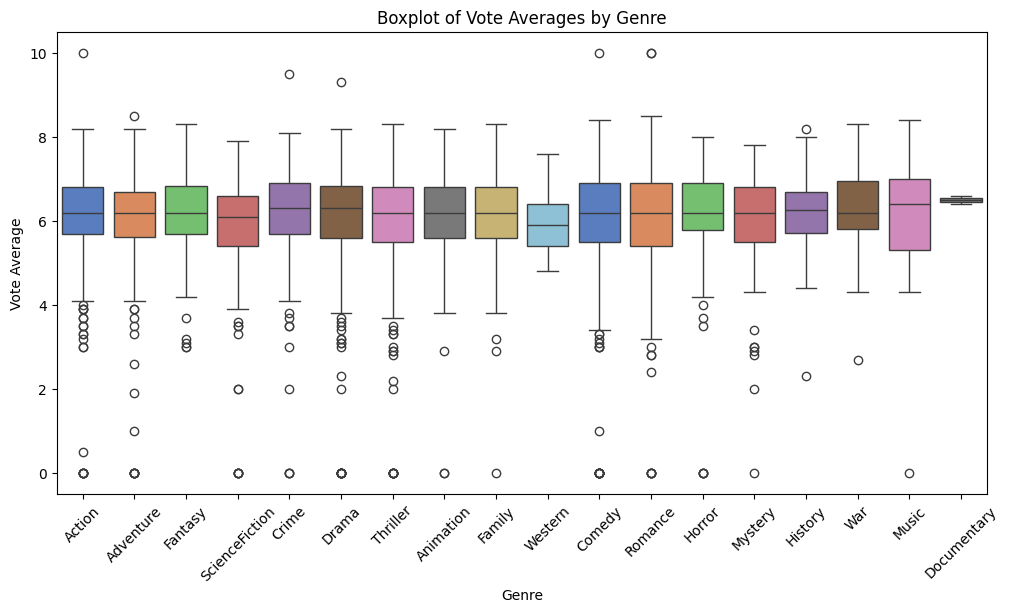

In [255]:
# Explode the 'genres' column into separate rows
exploded_genres = movies[['title', 'vote_average']].join(
    movies['genres'].str.split().explode().reset_index(drop=True)
)

plt.figure(figsize=(12, 6))
sns.boxplot(data=exploded_genres, x='genres', y='vote_average', palette='muted')
plt.title('Boxplot of Vote Averages by Genre')
plt.xlabel('Genre')
plt.ylabel('Vote Average')
plt.xticks(rotation=45)
plt.show()

Movie Recommendation based on Collaborative Filtering

In [256]:
# List of movies liked by User A
user_a_liked_movies = [
    {"name": "The Avengers", "genre": "Action, Sci-Fi", "vote_average": 8.0, "vote_count": 13000, "revenue": 1518812988},
    {"name": "Iron Man", "genre": "Action, Sci-Fi", "vote_average": 7.9, "vote_count": 12000, "revenue": 585174222},
    {"name": "Thor", "genre": "Action, Fantasy", "vote_average": 7.0, "vote_count": 8900, "revenue": 449326618},
    {"name": "Captain America", "genre": "Action, Adventure", "vote_average": 7.5, "vote_count": 9500, "revenue": 370569774},
    {"name": "Guardians of the Galaxy", "genre": "Action, Comedy, Sci-Fi", "vote_average": 8.1, "vote_count": 10000, "revenue": 773328629},
]

# Helper function to calculate similarity score
def calculate_similarity(movie1, movie2):
    # Weightage for each attribute
    genre_weight = 0.6
    vote_average_weight = 0.3
    revenue_weight = 0.1
    
    # Genre similarity
    genres1 = set(movie1['genre'].split(", "))
    genres2 = set(movie2['genre'].split(", "))
    genre_similarity = len(genres1.intersection(genres2)) / max(len(genres1), len(genres2))
    
    # Vote average similarity
    vote_average_similarity = 1 - abs(movie1['vote_average'] - movie2['vote_average']) / 10
    
    # Revenue similarity
    max_revenue = max(m['revenue'] for m in user_a_liked_movies)
    revenue_similarity = 1 - abs(movie1['revenue'] - movie2['revenue']) / max_revenue
    
    # we'll check overlap for genre and can be extended for cast/keywords
    genre_overlap = len(set(movie1['genre'].split(", ")).intersection(set(movie2['genre'].split(", "))))
    
    # Print overlap explanation (for debugging/clarification)
    print(f"Genre Overlap: {genre_overlap}")

    # Weighted similarity score
    return (genre_similarity * genre_weight + 
            vote_average_similarity * vote_average_weight + 
            revenue_similarity * revenue_weight)

# Function to get recommendations based on user's liked movies
def recommend_movies_for_user(movie):
    # Find the target movie's details
    target_movie = None
    for m in user_a_liked_movies:
        if m['name'] == movie:
            target_movie = m

    # Ensure the movie exists in the list
    if target_movie:
        # Calculate similarity scores
        scores = []
        for m in user_a_liked_movies:
            if m['name'] != movie:  # Exclude the current movie
                similarity_score = calculate_similarity(target_movie, m)
                scores.append({"name": m['name'], "similarity_score": similarity_score})
        
        # Sort by similarity score to get top 3
        top_matches = sorted(scores, key=lambda x: x['similarity_score'], reverse=True)[:3]
        
        # Top 3 recommendations
        print("\t\t\t\t\tTop 3 similar movies to:", movie, '\n')
        for match in top_matches:
            print(f"Movie: {match['name']}, Similarity Score: {match['similarity_score']*100:.1f}")
            final_list.append({"name": f"{match['name']}", "similarity": f"{match['similarity_score']*100:.1f}"})
        
    else:
        print(f"Movie '{movie}' not found in the list.")

recommend_movies_for_user(movie)




Genre Overlap: 2
Genre Overlap: 1
Genre Overlap: 1
Genre Overlap: 2
					Top 3 similar movies to: The Avengers 

Movie: Iron Man, Similarity Score: 93.6
Movie: Guardians of the Galaxy, Similarity Score: 74.8
Movie: Captain America, Similarity Score: 60.9


Resultant Movie Recommendations

In [257]:
def get_top_5_movies(movies):
    from collections import defaultdict
    
    # Group movies by name and calculate their average similarity
    movie_scores = defaultdict(list)
    for movie in movies:
        name = movie['name']
        similarity = float(movie['similarity'])
        movie_scores[name].append(similarity)

    # Calculate the average similarity score for each movie
    avg_scores = []
    for name, scores in movie_scores.items():
        avg_score = sum(scores) / len(scores)
        avg_scores.append({'name': name, 'average_similarity': avg_score})

    # Step 3: Sort movies by average similarity score in descending order
    avg_scores.sort(key=lambda x: x['average_similarity'], reverse=True)

    # top 5 movies
    return avg_scores[:5]

top_5_movies = get_top_5_movies(final_list)

print("\t\t\t\t\t\tMOVIE RECOMMENDATIONS\n")

for m in top_5_movies:
    print(f"Movie: {m['name']}, Similarity Score: {m['average_similarity']:.2f}")


						MOVIE RECOMMENDATIONS

Movie: Avengers: Age of Ultron, Similarity Score: 62.58
Movie: Captain America, Similarity Score: 60.90
Movie: Iron Man, Similarity Score: 55.33
Movie: Guardians of the Galaxy, Similarity Score: 44.43
Movie: Serenity, Similarity Score: 44.03


Similarity Scores 

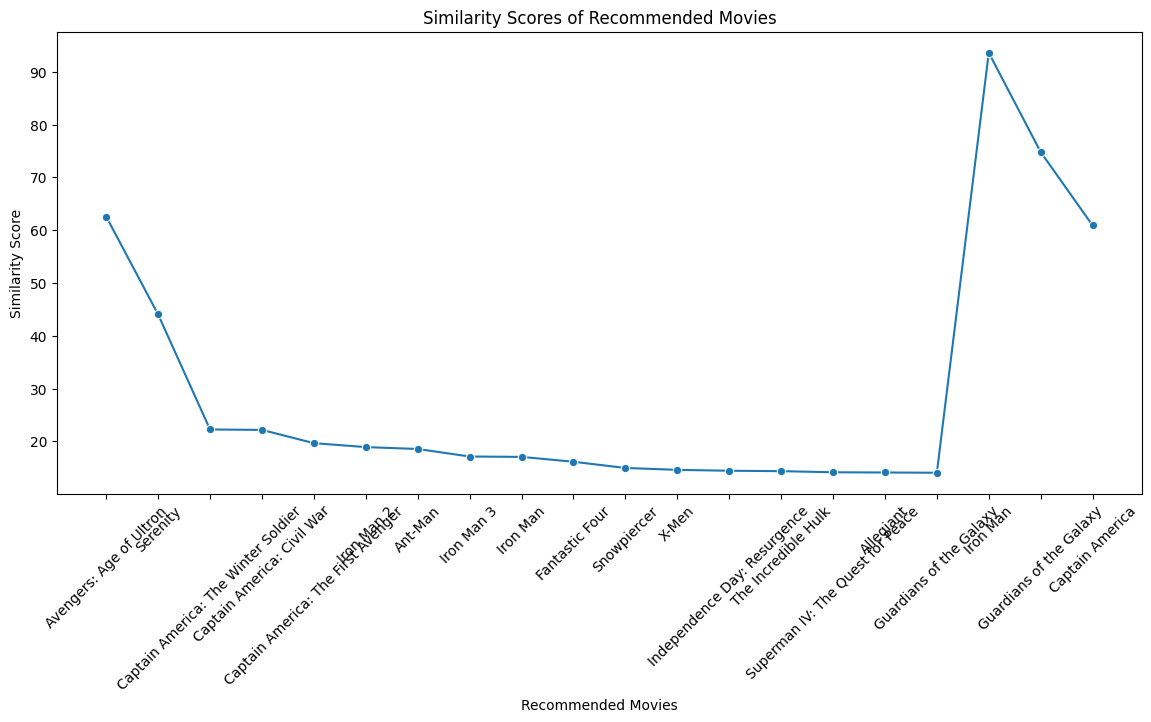

In [258]:
recommended_movies = pd.DataFrame(final_list)
recommended_movies['similarity'] = recommended_movies['similarity'].astype(float)

plt.figure(figsize=(14, 6))
sns.lineplot(data=recommended_movies, x=range(len(recommended_movies)), y='similarity', marker='o')
plt.title('Similarity Scores of Recommended Movies')
plt.xlabel('Recommended Movies')
plt.ylabel('Similarity Score')
plt.xticks(range(len(recommended_movies)), recommended_movies['name'], rotation=45)
plt.show()


Similarity Scores of Top 5 movies

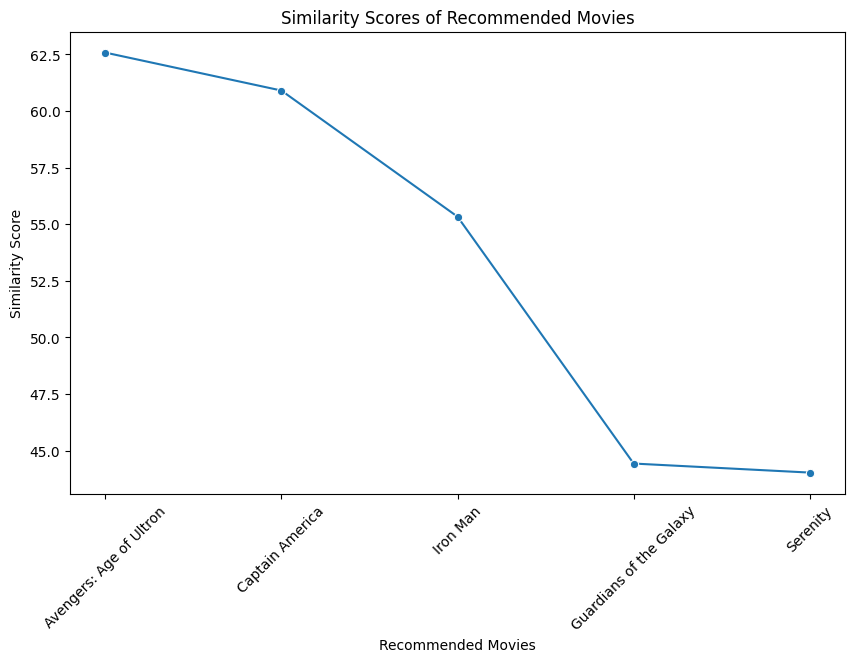

In [259]:
recommended_movies = pd.DataFrame(top_5_movies)
recommended_movies['average_similarity'] = recommended_movies['average_similarity'].astype(float)

plt.figure(figsize=(10, 6))
sns.lineplot(data=recommended_movies, x=range(len(recommended_movies)), y='average_similarity', marker='o')
plt.title('Similarity Scores of Recommended Movies')
plt.xlabel('Recommended Movies')
plt.ylabel('Similarity Score')
plt.xticks(range(len(recommended_movies)), recommended_movies['name'], rotation=45)
plt.show()